## Importando os // pandas // matplotlib // seaborn // statsmodel

In [130]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [131]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [132]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [133]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [134]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [135]:
# Listando os arquivos dentro da pasta de dados

files = os.listdir(r"D:\Documentos\Doutorado\Python\python_env_app\dados")
files = [ fname for fname in files if fname.endswith('.csv')]
files



['dados_A868_D_2020-01-01_2024-12-31.csv',
 'dados_A868_D_2024-01-01_2024-12-31.csv',
 'DADOS_TEMPERATURA.csv',
 'RJ0069RA002.csv',
 'SP0063RA002.csv']

In [136]:
# Abre o arquivo DADOS_TEMPERATURA

df = pd.read_csv(r"D:\Documentos\Doutorado\Python\python_env_app\dados\DADOS_TEMPERATURA.csv")

In [137]:
# Print colunas
print(df.columns)

Index(['DATETIME', 'TEMPERATURA_MAXIMA', 'TEMPERATURA_MEDIA',
       'TEMPERATURA_MINIMA'],
      dtype='object')


In [138]:
# Formatar coluna DATETIME; TEMPERATURA MÁXIMA, TEMPERATURA MÉDIA E TEMPERATURA MÍNIMA
df['DATETIME'] = pd.to_datetime(df['DATETIME'], format='%m/%d/%Y')
df['TEMPERATURA_MAXIMA'] = df['TEMPERATURA_MAXIMA'].astype(float)
df ['TEMPERATURA_MEDIA'] = df['TEMPERATURA_MEDIA'].astype(float)
df['TEMPERATURAM_MINIMA'] = df['TEMPERATURA_MINIMA'].astype(float)
print (df)



       DATETIME  TEMPERATURA_MAXIMA  TEMPERATURA_MEDIA  TEMPERATURA_MINIMA  \
0    2020-01-01                33.0               26.0                24.4   
1    2020-01-02                28.5               24.9                21.7   
2    2020-01-03                28.9               24.5                20.6   
3    2020-01-04                26.7               22.7                20.5   
4    2020-01-05                28.4               23.6                19.8   
...         ...                 ...                ...                 ...   
1822 2024-12-27                29.5               23.0                18.4   
1823 2024-12-28                28.3               24.5                21.9   
1824 2024-12-29                28.2               24.1                21.1   
1825 2024-12-30                27.3               23.2                20.4   
1826 2024-12-31                27.8               24.0                21.4   

      TEMPERATURAM_MINIMA  
0                    24.4  
1      

In [139]:
# Separar dia / mês / ano em colunas

df['Mes'] = df['DATETIME'].dt.month
df['Dia'] = df['DATETIME'].dt.day
df['Ano'] = df['DATETIME'].dt.year
print (df)


       DATETIME  TEMPERATURA_MAXIMA  TEMPERATURA_MEDIA  TEMPERATURA_MINIMA  \
0    2020-01-01                33.0               26.0                24.4   
1    2020-01-02                28.5               24.9                21.7   
2    2020-01-03                28.9               24.5                20.6   
3    2020-01-04                26.7               22.7                20.5   
4    2020-01-05                28.4               23.6                19.8   
...         ...                 ...                ...                 ...   
1822 2024-12-27                29.5               23.0                18.4   
1823 2024-12-28                28.3               24.5                21.9   
1824 2024-12-29                28.2               24.1                21.1   
1825 2024-12-30                27.3               23.2                20.4   
1826 2024-12-31                27.8               24.0                21.4   

      TEMPERATURAM_MINIMA  Mes  Dia   Ano  
0                  

In [140]:
# Verificação de dados faltantes
print(df.isnull().sum())
# Verificação dos tipos de dados
print(df.info())

DATETIME                 0
TEMPERATURA_MAXIMA     318
TEMPERATURA_MEDIA      373
TEMPERATURA_MINIMA     336
TEMPERATURAM_MINIMA    336
Mes                      0
Dia                      0
Ano                      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATETIME             1827 non-null   datetime64[ns]
 1   TEMPERATURA_MAXIMA   1509 non-null   float64       
 2   TEMPERATURA_MEDIA    1454 non-null   float64       
 3   TEMPERATURA_MINIMA   1491 non-null   float64       
 4   TEMPERATURAM_MINIMA  1491 non-null   float64       
 5   Mes                  1827 non-null   int32         
 6   Dia                  1827 non-null   int32         
 7   Ano                  1827 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(3)
memory usage: 92.9 KB
None


In [141]:
# Criar coluna de mês e nome do mês
df['Mes'] = df['DATETIME'].dt.month
df['Mes_agrup'] = df['DATETIME'].dt.month_name(locale='pt_BR')

# Colunas para calcular a média
colunas_temperatura = ['TEMPERATURA_MAXIMA', 'TEMPERATURA_MINIMA', 'TEMPERATURA_MEDIA']

# Agrupar por mês e calcular a média para as três colunas
df_mensal = df.groupby(['Mes', 'Mes_agrup'])[colunas_temperatura].mean().reset_index()

# Ordenar pelo número do Mês ('Mes')
df_mensal = df_mensal.sort_values('Mes')


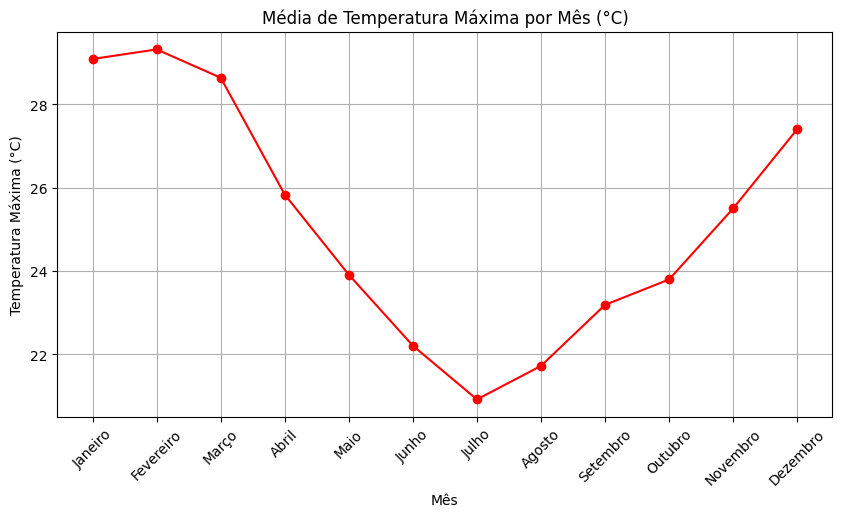

In [142]:
# Criando gráfico Média de Temperatura Máxima
plt.figure(figsize=(10,5))
plt.plot(df_mensal['Mes_agrup'], df_mensal['TEMPERATURA_MAXIMA'], marker='o', linestyle='-', color='red')
plt.title('Média de Temperatura Máxima por Mês (°C)')
plt.xlabel('Mês')
plt.ylabel('Temperatura Máxima (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

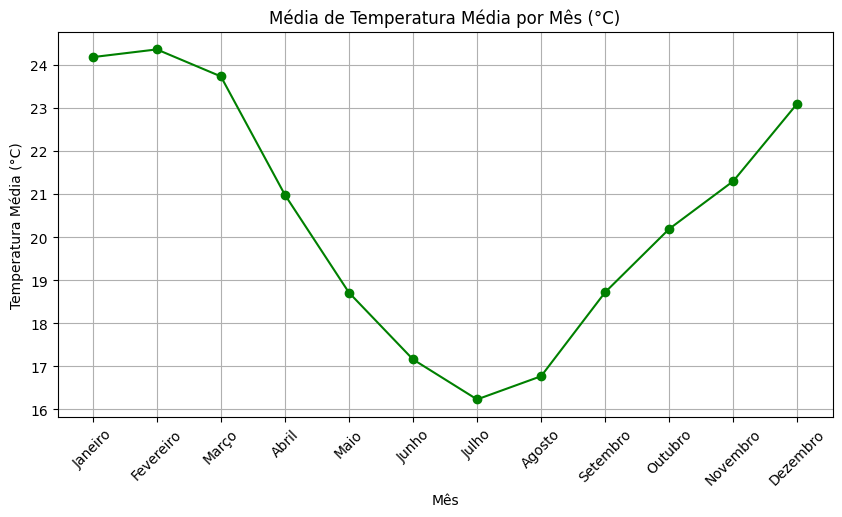

In [143]:
# Criando gráfico Média de Temperatura Média
plt.figure(figsize=(10,5))
plt.plot(df_mensal['Mes_agrup'], df_mensal['TEMPERATURA_MEDIA'], marker='o', linestyle='-', color='green')
plt.title('Média de Temperatura Média por Mês (°C)')
plt.xlabel('Mês')
plt.ylabel('Temperatura Média (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

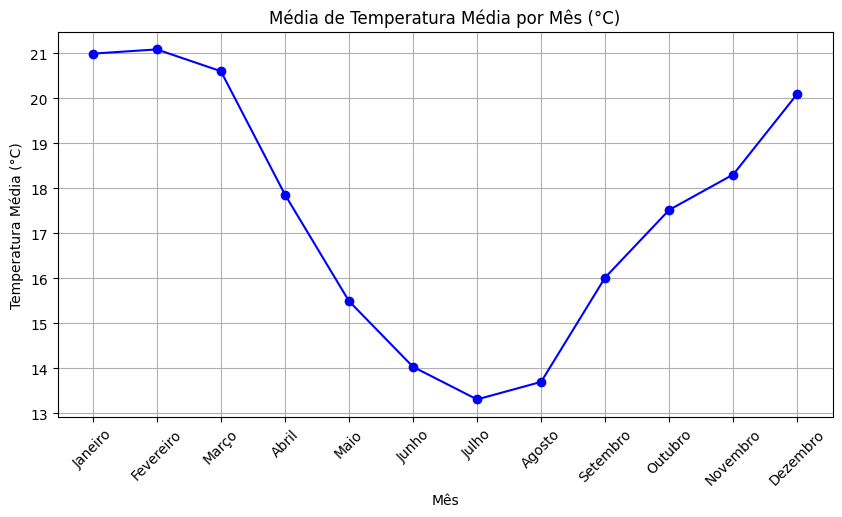

In [144]:
# Criando gráfico Média de Temperatura Mínima
plt.figure(figsize=(10,5))
plt.plot(df_mensal['Mes_agrup'], df_mensal['TEMPERATURA_MINIMA'], marker='o', linestyle='-', color='blue')
plt.title('Média de Temperatura Média por Mês (°C)')
plt.xlabel('Mês')
plt.ylabel('Temperatura Média (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

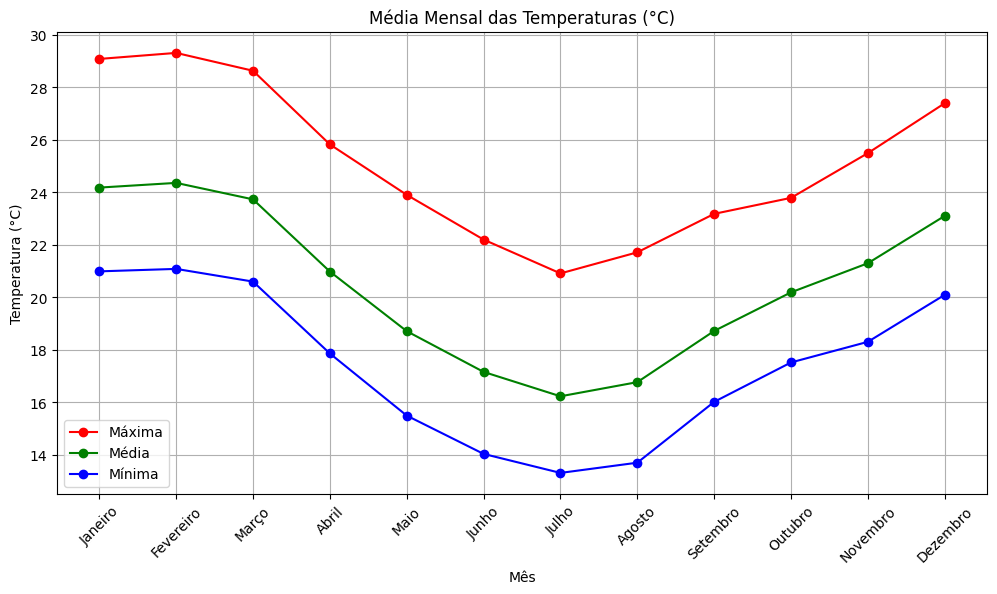

In [145]:
# Criando um único gráfico com as 3 temperaturas
plt.figure(figsize=(12,6))

# 1. TEMPERATURA_MAXIMA (Vermelho)
plt.plot(df_mensal['Mes_agrup'], df_mensal['TEMPERATURA_MAXIMA'], marker='o', linestyle='-', color='red', label='Máxima')

# 2. TEMPERATURA_MEDIA (Azul)
plt.plot(df_mensal['Mes_agrup'], df_mensal['TEMPERATURA_MEDIA'], marker='o', linestyle='-', color='green', label='Média')

# 3. TEMPERATURA_MINIMA (Verde)
plt.plot(df_mensal['Mes_agrup'], df_mensal['TEMPERATURA_MINIMA'], marker='o', linestyle='-', color='blue', label='Mínima')

# Títulos e Rótulos
plt.title('Média Mensal das Temperaturas (°C)')
plt.xlabel('Mês')
plt.ylabel('Temperatura (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend() 
plt.show()

In [146]:
# Análise descritiva para as temperaturas no DataFrame original (df)

print(df[['TEMPERATURA_MAXIMA', 'TEMPERATURA_MINIMA', 'TEMPERATURA_MEDIA']].describe())

       TEMPERATURA_MAXIMA  TEMPERATURA_MINIMA  TEMPERATURA_MEDIA
count         1509.000000         1491.000000        1454.000000
mean            25.003446           17.352918          20.371596
std              4.179277            3.828829           3.593032
min             12.600000            3.100000           9.200000
25%             22.100000           14.700000          17.725000
50%             25.100000           17.700000          20.500000
75%             28.100000           20.300000          23.300000
max             36.500000           25.400000          28.100000


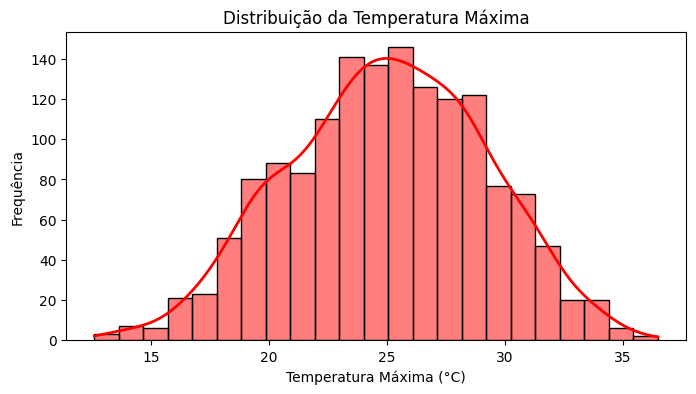

In [147]:
# Histograma para a Temperatura Máxima (entender o formato da distribuição)

import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(
    df['TEMPERATURA_MAXIMA'],
    kde=True,
    color='red',
    line_kws={'color': 'black', 'lw': 2, 'linestyle': '-'})

plt.title('Distribuição da Temperatura Máxima')
plt.xlabel('Temperatura Máxima (°C)')
plt.ylabel('Frequência')
plt.show()

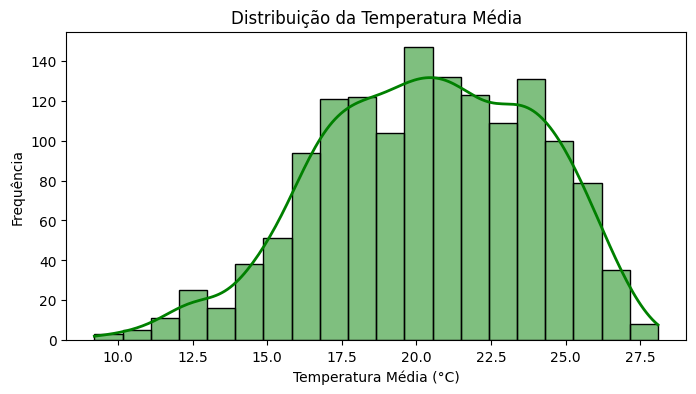

In [148]:
# Histograma para a Temperatura Média (entender o formato da distribuição)

import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(
    df['TEMPERATURA_MEDIA'],
    kde=True,
    color='green',
    line_kws={'color': 'black', 'lw': 2, 'linestyle': '-'})

plt.title('Distribuição da Temperatura Média')
plt.xlabel('Temperatura Média (°C)') 
plt.ylabel('Frequência')
plt.show()

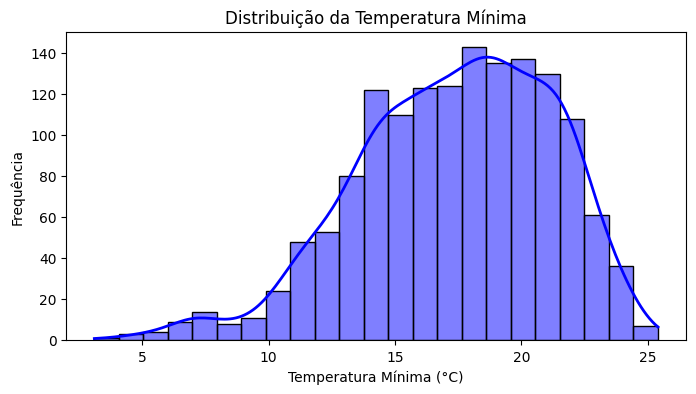

In [149]:
# Histograma para a Temperatura Mínima (entender o formato da distribuição)

import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(
    df['TEMPERATURA_MINIMA'],
    kde=True,
    color='blue',
    line_kws={'color': 'black', 'lw': 2, 'linestyle': '-'})

plt.title('Distribuição da Temperatura Mínima')
plt.xlabel('Temperatura Mínima (°C)')
plt.ylabel('Frequência')
plt.show()

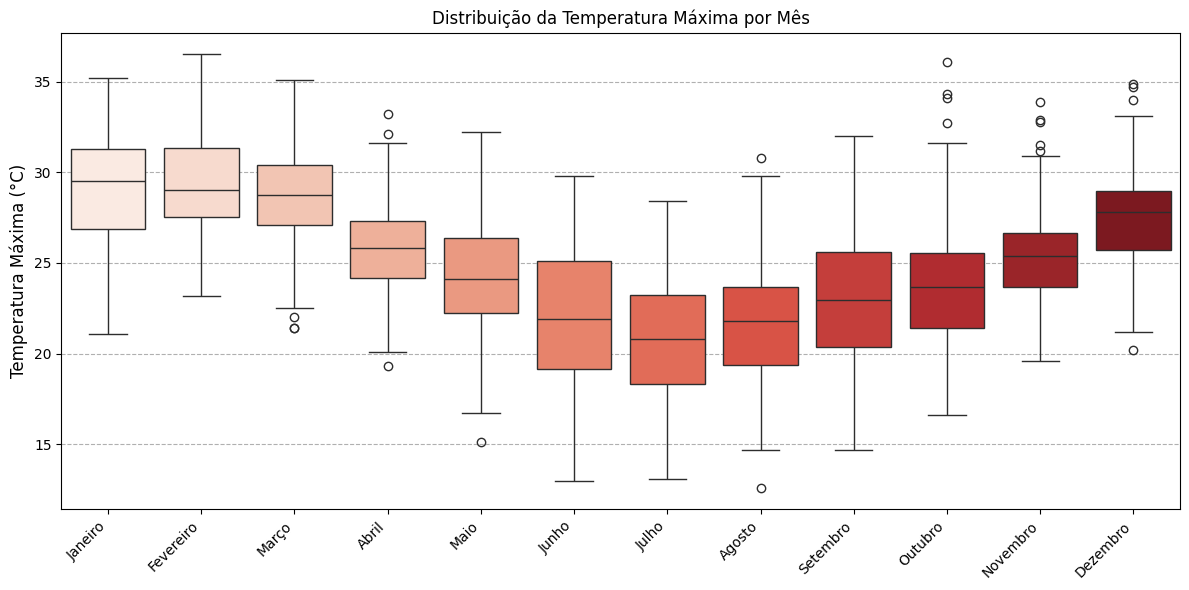

In [150]:
#Distribuição da Temperatura Máxima por Mês

plt.figure(figsize=(12, 6))

sns.boxplot(
    x='Mes_agrup',
    y='TEMPERATURA_MAXIMA',
    data=df,
    order=df_mensal['Mes_agrup'],
    palette='Reds',
    hue='Mes_agrup', 
    legend=False)

plt.title('Distribuição da Temperatura Máxima por Mês', fontsize=12)
plt.ylabel('Temperatura Máxima (°C)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

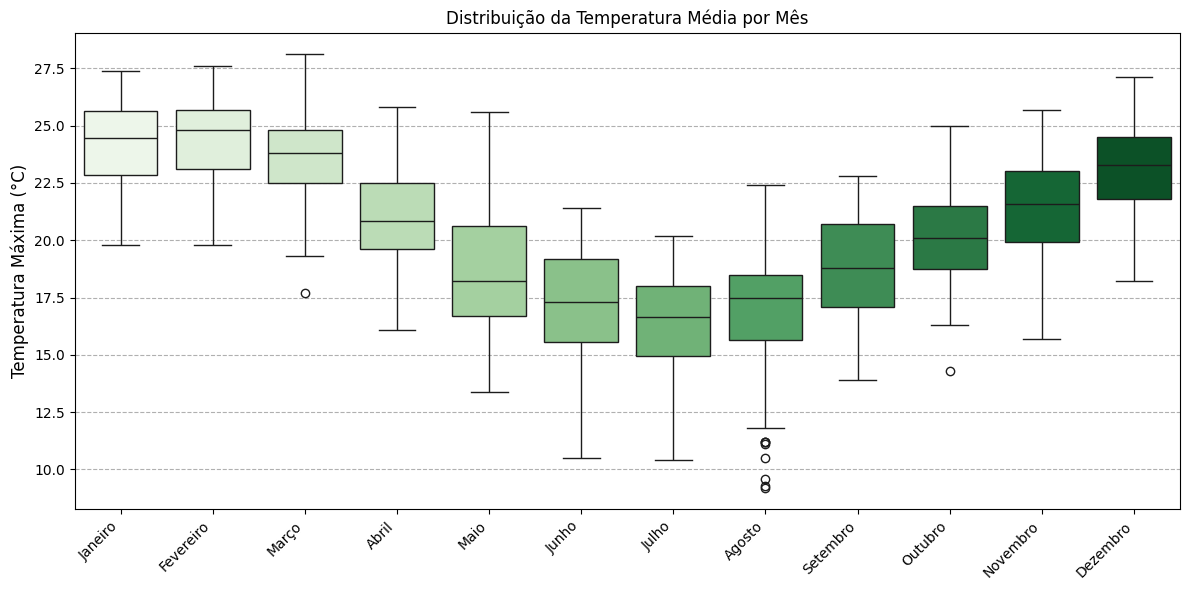

In [151]:
#Distribuição da Temperatura Média por Mês

plt.figure(figsize=(12, 6))

sns.boxplot(
    x='Mes_agrup',
    y='TEMPERATURA_MEDIA',
    data=df,
    order=df_mensal['Mes_agrup'],
    palette='Greens',
    hue='Mes_agrup', 
    legend=False)

plt.title('Distribuição da Temperatura Média por Mês', fontsize=12)
plt.ylabel('Temperatura Máxima (°C)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

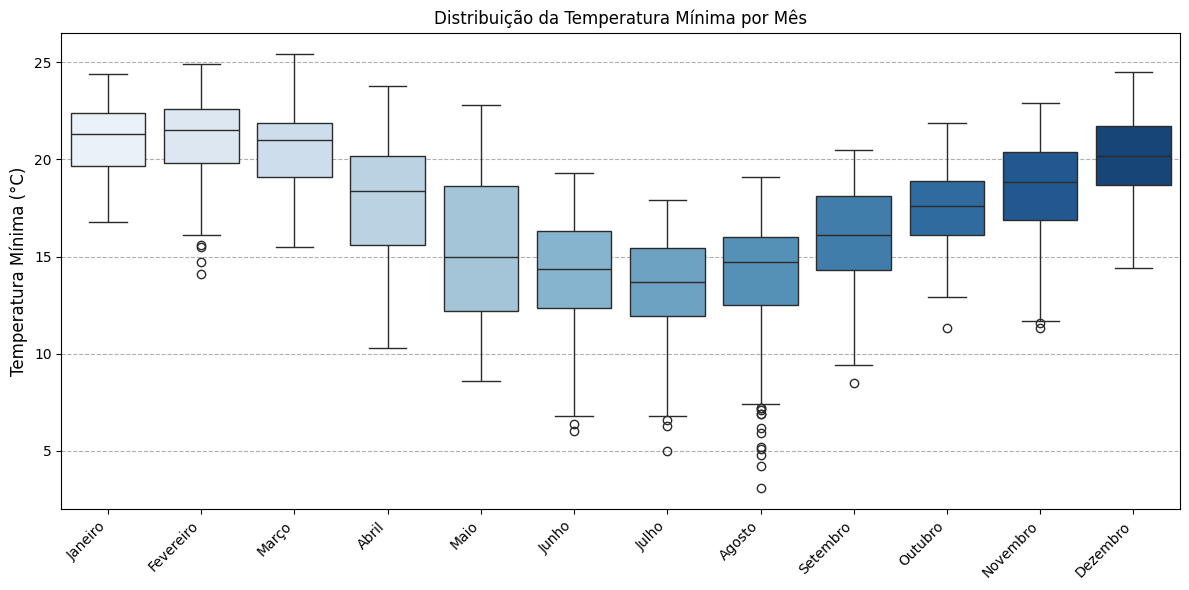

In [152]:
#Distribuição da Temperatura Mínima por Mês

plt.figure(figsize=(12, 6))

sns.boxplot(
    x='Mes_agrup',
    y='TEMPERATURA_MINIMA',
    data=df,
    order=df_mensal['Mes_agrup'],
    palette='Blues',
    hue='Mes_agrup', 
    legend=False)

plt.title('Distribuição da Temperatura Mínima por Mês', fontsize=12)
plt.ylabel('Temperatura Mínima (°C)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

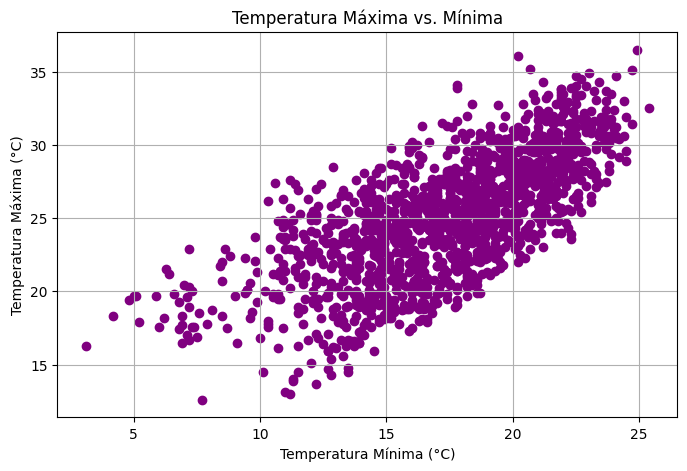

In [161]:
# Scatter plot da Temperatura Máxima vs. Mínima
plt.figure(figsize=(8, 5))
plt.scatter(df['TEMPERATURA_MINIMA'], df['TEMPERATURA_MAXIMA'], c='purple')
plt.title('Temperatura Máxima vs. Mínima', fontsize=12)
plt.xlabel('Temperatura Mínima (°C)', fontsize=10)
plt.ylabel('Temperatura Máxima (°C)', fontsize=10)
plt.grid(True)
plt.show()